In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,CASH,2,1,191.250000,503.290008,Late delivery,1,68,Garden,San Jose,...,NaN,1355.0,68.0,NaN,http://images.acmesports.sports/Lawn+mower,Lawn mower,532.580017,0.0,11/16/2017 2:23,First Class
6010,CASH,2,1,227.039993,463.339996,Late delivery,1,68,Garden,Opa Locka,...,NaN,1355.0,68.0,NaN,http://images.acmesports.sports/Lawn+mower,Lawn mower,532.580017,0.0,11/19/2017 10:37,First Class
6011,CASH,2,1,-15.220000,21.740000,Late delivery,1,40,Accessories,Lilburn,...,NaN,906.0,40.0,NaN,http://images.acmesports.sports/Team+Golf+Tenn...,Team Golf Tennessee Volunteers Putter Grip,24.990000,0.0,11/19/2016 19:42,First Class
6012,CASH,2,1,3.320000,20.740000,Late delivery,1,40,Accessories,Fairfield,...,NaN,885.0,40.0,NaN,http://images.acmesports.sports/Team+Golf+St.+...,Team Golf St. Louis Cardinals Putter Grip,24.990000,0.0,1/4/2016 14:33,First Class


Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           6014 non-null   object 
 1   Days for shipping (real)       6014 non-null   int64  
 2   Days for shipment (scheduled)  6014 non-null   int64  
 3   Benefit per order              6014 non-null   float64
 4   Sales per customer             6014 non-null   float64
 5   Delivery Status                6014 non-null   object 
 6   Late_delivery_risk             6014 non-null   int64  
 7   Category Id                    6014 non-null   int64  
 8   Category Name                  6014 non-null   object 
 9   Customer City                  6014 non-null   object 
 10  Customer Country               6014 non-null   object 
 11  Customer Email                 6014 non-null   object 
 12  Customer Fname                 6014 non-null   o

In [5]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,...,6014.000000,6014.000000,6014.000000,6014.000000,374.000000,6013.000000,6013.000000,0.0,6013.000000,6013.0
mean,3.674260,3.204855,21.812765,184.635161,0.516794,27.155637,7565.281510,34848.059694,4.383106,29.356422,...,2.519953,205.924056,184.635161,21.812765,54778.489305,568.712623,27.153501,NaN,125.306003,0.0
std,1.532229,1.222986,103.913841,121.766240,0.499759,18.983911,4919.574449,37593.561543,1.753727,9.820957,...,1.635051,135.204477,121.766240,103.913841,31448.129722,374.568960,18.984767,NaN,134.718040,0.0
min,0.000000,0.000000,-1140.790039,9.260000,0.000000,2.000000,6.000000,603.000000,2.000000,17.982491,...,1.000000,11.290000,9.260000,-1140.790039,1841.000000,24.000000,2.000000,NaN,11.290000,0.0
25%,2.000000,2.000000,6.150000,99.580002,0.000000,17.000000,3671.750000,725.000000,3.000000,18.261368,...,1.000000,119.970001,99.580002,6.150000,27604.000000,365.000000,17.000000,NaN,50.000000,0.0
50%,4.000000,4.000000,29.879999,163.770004,1.000000,18.000000,7161.500000,15642.000000,4.000000,32.958281,...,2.000000,179.970001,163.770004,29.879999,55407.000000,403.000000,18.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,67.500000,262.200012,1.000000,37.000000,10563.000000,77840.000000,5.000000,38.954873,...,4.000000,299.970001,262.200012,67.500000,85705.000000,828.000000,37.000000,NaN,129.990005,0.0
max,6.000000,4.000000,599.250000,1417.500000,1.000000,76.000000,20755.000000,98632.000000,12.000000,47.843224,...,5.000000,1500.000000,1417.500000,599.250000,99301.000000,1363.000000,76.000000,NaN,1500.000000,0.0


In [8]:
df.isna().sum()

Type                                0
Days for shipping (real)            0
Days for shipment (scheduled)       0
Benefit per order                   0
Sales per customer                  0
Delivery Status                     0
Late_delivery_risk                  0
Category Id                         0
Category Name                       0
Customer City                       0
Customer Country                    0
Customer Id                         0
Customer Lname                      0
Customer Segment                    0
Customer State                      0
Customer Street                     0
Customer Zipcode                    0
Department Id                       0
Department Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order City                          0
Order Country                       0
Order Customer Id                   0
order date (DateOrders)             0
Order Id    

In [12]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type Of Payments               6014 non-null   object 
 1   Days for shipping (real)       6014 non-null   int64  
 2   Days for shipment (scheduled)  6014 non-null   int64  
 3   Benefit per order              6014 non-null   float64
 4   Sales per customer             6014 non-null   float64
 5   Delivery Status                6014 non-null   object 
 6   Late_delivery_risk             6014 non-null   int64  
 7   Category Id                    6014 non-null   int64  
 8   Category Name                  6014 non-null   object 
 9   Customer City                  6014 non-null   object 
 10  Customer Country               6014 non-null   object 
 11  Customer Id                    6014 non-null   int64  
 12  Customer Lname                 6014 non-null   o

Data Anlysis and Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
df1=df["Order Status"].value_counts()
df1

COMPLETE           2091
PENDING_PAYMENT     864
PROCESSING          860
CLOSED              764
PENDING             732
ON_HOLD             345
SUSPECTED_FRAUD     185
CANCELED            137
PAYMENT_REVIEW       35
Name: Order Status, dtype: int64

Text(0.5, 1.0, 'Order Status')

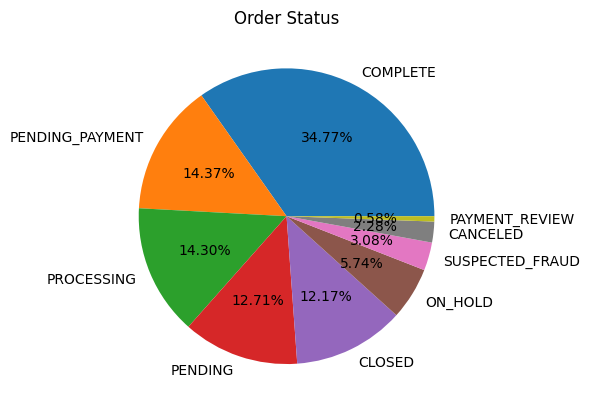

In [16]:
label=["COMPLETE","PENDING_PAYMENT","PROCESSING","PENDING","CLOSED","ON_HOLD","SUSPECTED_FRAUD","CANCELED","PAYMENT_REVIEW"]
plt.pie(df1,labels=label, autopct='%1.2f%%')
plt.title("Order Status")

In [17]:
suc_pro=df[(df["Days for shipping (real)"])>(df["Days for shipment (scheduled)"])]

In [18]:
suc_pro=suc_pro[(suc_pro["Order Status"]== "COMPLETE")]
suc_pro

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 10:42,First Class
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 8:15,First Class
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 7:33,First Class
18,DEBIT,2,1,102.260002,314.640015,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 6:30,First Class
25,DEBIT,6,2,131.169998,285.140015,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/19/2018 4:03,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,DEBIT,2,1,5.400000,71.980003,Late delivery,1,6,Tennis & Racquet,Rome,...,COMPLETE,NaN,116.0,6.0,NaN,Nike Men's Comfort 2 Slide,44.990002,0.0,3/14/2017 12:01,First Class
5734,DEBIT,5,2,13.830000,184.460007,Late delivery,1,6,Tennis & Racquet,Caguas,...,COMPLETE,NaN,116.0,6.0,NaN,Nike Men's Comfort 2 Slide,44.990002,0.0,3/14/2017 14:38,Second Class
5747,DEBIT,6,4,29.480000,113.370003,Late delivery,1,6,Tennis & Racquet,Wyoming,...,COMPLETE,NaN,116.0,6.0,NaN,Nike Men's Comfort 2 Slide,44.990002,0.0,2/12/2017 2:15,Standard Class
5748,DEBIT,5,4,-230.289993,172.759995,Late delivery,1,6,Tennis & Racquet,Newburgh,...,COMPLETE,NaN,116.0,6.0,NaN,Nike Men's Comfort 2 Slide,44.990002,0.0,2/8/2017 7:20,Standard Class


In [19]:
delivery_status=suc_pro.groupby(["Order Country"])["Order Status"].count().reset_index(name="Number of orders")
px.bar(delivery_status,x=delivery_status["Order Country"],y=delivery_status["Number of orders"],
       color=delivery_status["Number of orders"],
       labels={"Order Country":"Order Country","Number of orders":"Number of orders"})

In [20]:
pending_cities=df[(df["Order Country"]=="Australia") & (df["Order Status"]=="PENDING")]
pending_cities

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
22,TRANSFER,4,2,22.370001,298.250000,Late delivery,1,73,Sporting Goods,Rancho Cordova,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/17/2018 5:06,Second Class
26,TRANSFER,5,2,90.540001,278.589996,Late delivery,1,73,Sporting Goods,Wilkes Barre,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/18/2018 3:42,Second Class
370,TRANSFER,5,4,37.169998,309.720001,Late delivery,1,73,Sporting Goods,Bismarck,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/17/2018 17:11,Standard Class
390,TRANSFER,5,4,146.139999,298.250000,Late delivery,1,73,Sporting Goods,Rio Grande,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/17/2018 10:11,Standard Class
392,TRANSFER,3,4,-447.049988,288.420013,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 9:29,Standard Class
700,TRANSFER,5,4,-34.950001,150.000000,Late delivery,1,9,Cardio Equipment,Caguas,...,PENDING,NaN,172.0,9.0,NaN,Nike Women's Tempo Shorts,30.000000,0.0,3/27/2016 12:20,Standard Class
711,TRANSFER,4,4,-97.650002,254.960007,Shipping on time,0,17,Cleats,Caguas,...,PENDING,NaN,365.0,17.0,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0.0,1/11/2016 0:42,Standard Class
718,TRANSFER,3,4,95.019997,197.949997,Advance shipping,0,29,Shop By Sport,Caguas,...,PENDING,NaN,627.0,29.0,NaN,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0.0,2/26/2016 7:28,Standard Class
1022,TRANSFER,3,4,50.950001,195.979996,Advance shipping,0,9,Cardio Equipment,Kailua,...,PENDING,NaN,191.0,9.0,NaN,Nike Men's Free 5.0+ Running Shoe,99.989998,0.0,11/9/2015 9:54,Standard Class
1029,TRANSFER,3,4,51.830002,115.180000,Advance shipping,0,17,Cleats,Kailua,...,PENDING,NaN,365.0,17.0,NaN,Perfect Fitness Perfect Rip Deck,59.990002,0.0,11/9/2015 9:54,Standard Class


In [21]:
order_pending=df[df["Order Status"]=="PENDING"]
order_pending

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/18/2018 12:27,Standard Class
11,TRANSFER,5,2,45.689999,268.760010,Late delivery,1,73,Sporting Goods,Freeport,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/18/2018 8:57,Second Class
12,TRANSFER,4,2,21.760000,262.200012,Late delivery,1,73,Sporting Goods,Salinas,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/17/2018 8:36,Second Class
21,TRANSFER,5,4,82.300003,304.809998,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/18/2018 5:27,Standard Class
22,TRANSFER,4,2,22.370001,298.250000,Late delivery,1,73,Sporting Goods,Rancho Cordova,...,PENDING,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/17/2018 5:06,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,TRANSFER,2,1,-173.240005,247.490005,Late delivery,1,7,Hockey,Chicago,...,PENDING,NaN,127.0,7.0,NaN,Stiga Master Series ST3100 Competition Indoor,329.989990,0.0,9/18/2017 14:54,First Class
5716,TRANSFER,2,4,107.709999,316.790008,Advance shipping,0,7,Hockey,Webster,...,PENDING,NaN,127.0,7.0,NaN,Stiga Master Series ST3100 Competition Indoor,329.989990,0.0,9/17/2017 2:49,Standard Class
5720,TRANSFER,2,4,52.549999,300.290008,Advance shipping,0,7,Hockey,Porterville,...,PENDING,NaN,127.0,7.0,NaN,Stiga Master Series ST3100 Competition Indoor,329.989990,0.0,9/14/2017 17:00,Standard Class
5729,TRANSFER,2,4,-7.150000,125.519997,Advance shipping,0,6,Tennis & Racquet,El Paso,...,PENDING,NaN,116.0,6.0,NaN,Nike Men's Comfort 2 Slide,44.990002,0.0,4/4/2017 13:54,Standard Class


In [22]:
#order country
order_pending["Order Country"].value_counts()

Estados Unidos    91
Mxico             54
Australia         50
Francia           44
Brasil            42
                  ..
Kazajistn          1
Uruguay            1
Nepal              1
Noruega            1
Uganda             1
Name: Order Country, Length: 73, dtype: int64

<Axes: title={'center': 'Countries with Pending Status'}>

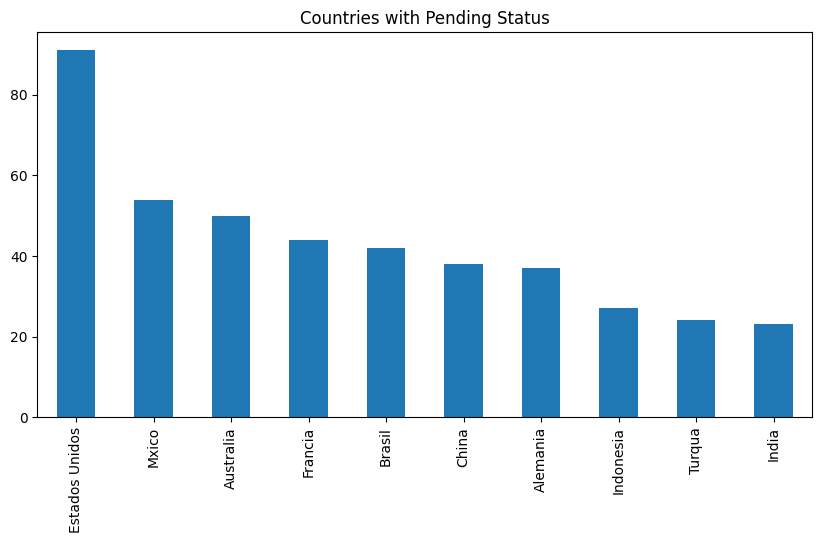

In [23]:
order_pending["Order Country"].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Countries with Pending Status")

In [24]:
#order city
order_pending["Order City"].value_counts()

Santo Domingo    16
Los Angeles       9
Newcastle         8
Manila            8
Len               8
                 ..
Sumy              1
Bayonne           1
Marseille         1
Birmingham        1
Valles            1
Name: Order City, Length: 441, dtype: int64

<Axes: title={'center': 'Cities with Pending Status'}>

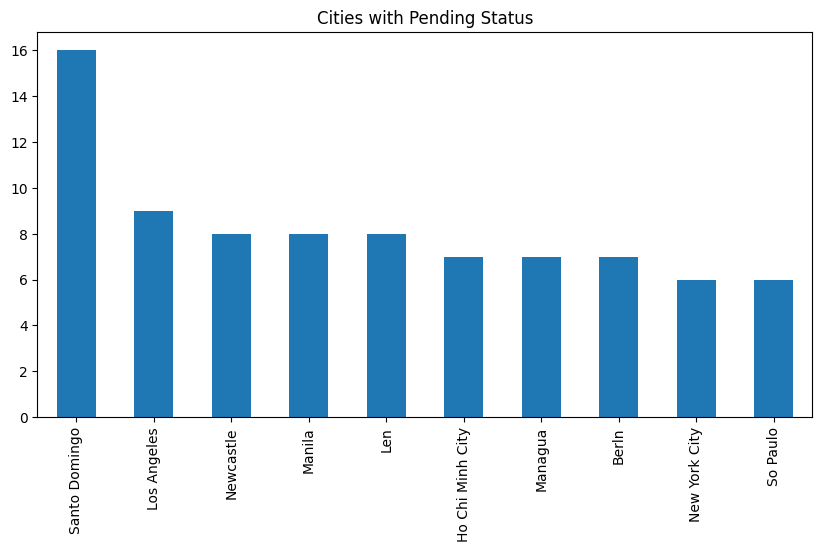

In [25]:
order_pending["Order City"].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Cities with Pending Status")

In [26]:
df['Order Country'].nunique()

125

In [27]:
df['Order Country'].value_counts()

Francia           455
Australia         446
Mxico             446
Estados Unidos    374
China             325
                 ... 
Laos                1
Yemen               1
Lesoto              1
Etiopa              1
Martinica           1
Name: Order Country, Length: 125, dtype: int64

In [28]:
fraud_detected=df[df["Order Status"]=="SUSPECTED_FRAUD"]
fraud_detected

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,...,SUSPECTED_FRAUD,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/19/2018 9:18,Second Class
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,73,Sporting Goods,Billings,...,SUSPECTED_FRAUD,NaN,1360.0,73.0,NaN,Smart watch,327.750000,0.0,1/15/2018 4:24,Second Class
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,13,Electronics,Freeport,...,SUSPECTED_FRAUD,77041.0,278.0,13.0,NaN,Under Armour Men's Compression EV SL Slide,44.990002,0.0,5/13/2016 17:42,Standard Class
184,TRANSFER,5,4,133.910004,278.970001,Shipping canceled,0,9,Cardio Equipment,Fort Washington,...,SUSPECTED_FRAUD,85234.0,191.0,9.0,NaN,Nike Men's Free 5.0+ Running Shoe,99.989998,0.0,4/7/2016 19:51,Standard Class
185,TRANSFER,6,4,79.160004,272.970001,Shipping canceled,0,9,Cardio Equipment,Bakersfield,...,SUSPECTED_FRAUD,95123.0,191.0,9.0,NaN,Nike Men's Free 5.0+ Running Shoe,99.989998,0.0,8/20/2016 2:51,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,TRANSFER,5,2,-87.000000,108.750000,Shipping canceled,0,7,Hockey,Caguas,...,SUSPECTED_FRAUD,NaN,134.0,7.0,NaN,Nike Women's Legend V-Neck T-Shirt,25.000000,0.0,12/17/2015 17:12,Second Class
5585,TRANSFER,4,4,12.480000,48.000000,Shipping canceled,0,7,Hockey,Pompano Beach,...,SUSPECTED_FRAUD,NaN,134.0,7.0,NaN,Nike Women's Legend V-Neck T-Shirt,25.000000,0.0,11/24/2015 21:05,Standard Class
5654,TRANSFER,4,4,23.770000,48.500000,Shipping canceled,0,7,Hockey,Caguas,...,SUSPECTED_FRAUD,NaN,134.0,7.0,NaN,Nike Women's Legend V-Neck T-Shirt,25.000000,0.0,5/11/2015 17:41,Standard Class
5668,TRANSFER,5,4,33.720001,103.750000,Shipping canceled,0,7,Hockey,Saginaw,...,SUSPECTED_FRAUD,NaN,134.0,7.0,NaN,Nike Women's Legend V-Neck T-Shirt,25.000000,0.0,4/2/2015 14:35,Standard Class


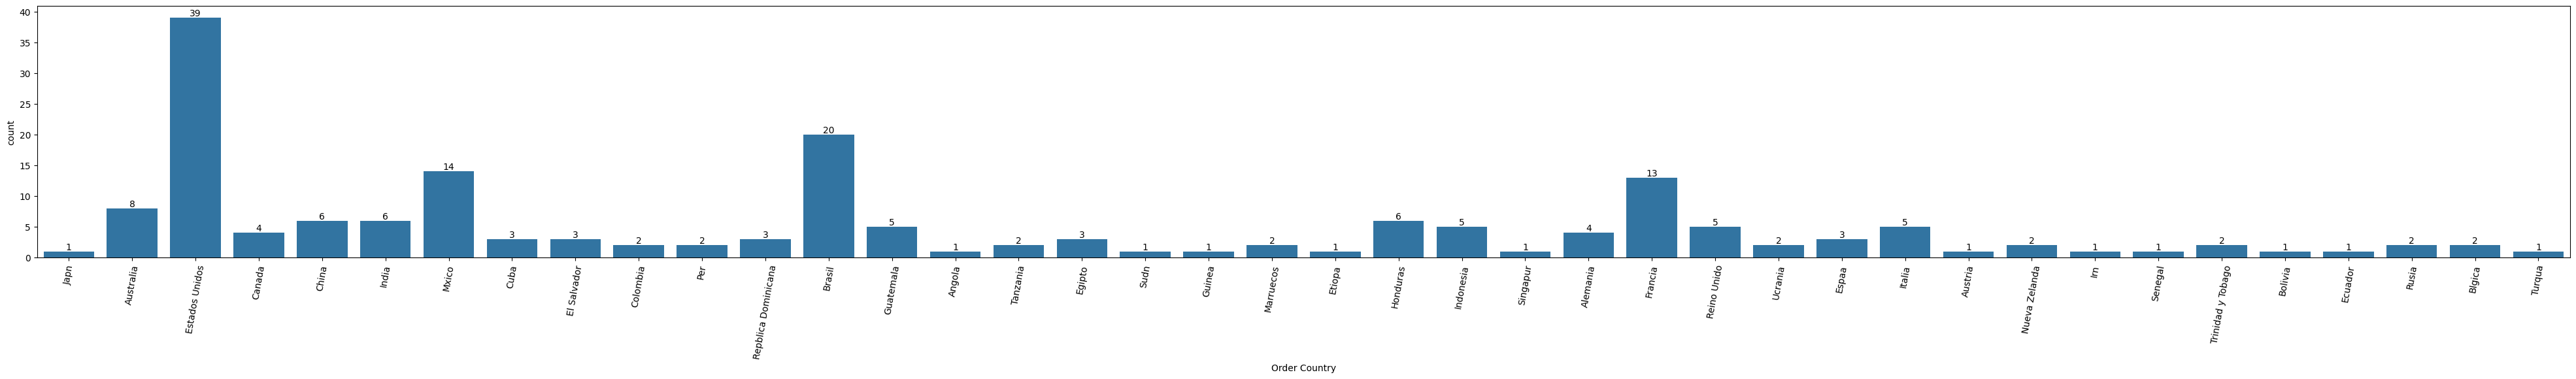

In [29]:
#order Country
plt.figure(figsize=(50,5))

ax=sns.countplot(data=fraud_detected,x="Order Country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [30]:
#customer country
fraud_detected["Customer Country"].value_counts()

EE. UU.        140
Puerto Rico     45
Name: Customer Country, dtype: int64

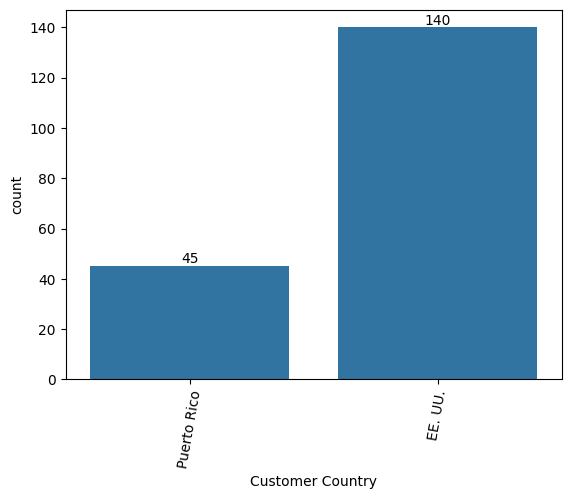

In [31]:
ax=sns.countplot(data=fraud_detected,x="Customer Country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [32]:
df2=pd.DataFrame(df, columns=["Product Name","Order Item Discount"])
df2.groupby(["Product Name","Order Item Discount"]).sum().sort_values(by="Order Item Discount",ascending=False).head(1)

,
Product Name,Order Item Discount
Dell Laptop,375.0


Delivery Status

In [33]:
#By Order
delivery_status=df.groupby(["Delivery Status"])["Order Id"].count().reset_index(name="Number of orders")
px.bar(delivery_status,x=delivery_status["Delivery Status"],y=delivery_status["Number of orders"],
       labels={"Delivery Status":"Delivery Status","Number of orders":"Number of orders"},
      title="Categorised Orders with delivery status")

In [34]:
#By Order Ragion
delivery_status_region=df.groupby(["Delivery Status","Order Region"])["Order Id"].count().reset_index(name="Number of orders")
px.bar(delivery_status_region,x="Delivery Status",y="Number of orders",
       color=delivery_status_region["Order Region"],
       labels={"Delivery Status":"Delivery Status","Number of orders":"Number of orders"})

In [35]:
profit_data=df.groupby(["Product Name"])["Order Item Profit Ratio"].count().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(10)
px.bar(profit_data,x=profit_data["Product Name"],y=profit_data["Profit"],
        labels={"Product Name":"Product Name","Profit":"Profit"})

Top 10 Customer by profit

In [36]:
df["Customer_ID_STR"]=df['Customer Id'].astype(str)

customer_profit=df.groupby(["Customer_ID_STR"])["Order Profit Per Order"].sum().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(10)
px.bar(customer_profit,x=customer_profit["Profit"],y=customer_profit["Customer_ID_STR"],
       color=customer_profit["Profit"],
       labels={"Customer_ID_STR":"Customer_ID_STR","Profit":"Profit"},
      title="Which customer is has maximum profit")

Types of payment modes

In [37]:
df1=df["Type Of Payments"].value_counts()
df1

DEBIT       2436
TRANSFER    1914
PAYMENT      899
CASH         765
Name: Type Of Payments, dtype: int64

In [38]:
#By Customer City

payment_mode=df.groupby(["Type Of Payments","Customer City"])["Order Id"].sum().reset_index(name="Number of orders").sort_values(by="Number of orders",ascending=False)
px.bar(payment_mode,x="Type Of Payments",y="Number of orders",
       color=payment_mode["Customer City"],
       labels={"Type Of Payments":"Type Of Payments","Number of orders":"Number of orders"})

Type of shipping mode

In [39]:
df1=df["Shipping Mode"].value_counts()
df1

Standard Class    4114
Second Class      1061
First Class        695
Same Day           143
Name: Shipping Mode, dtype: int64

Text(0.5, 1.0, 'Shipping Status')

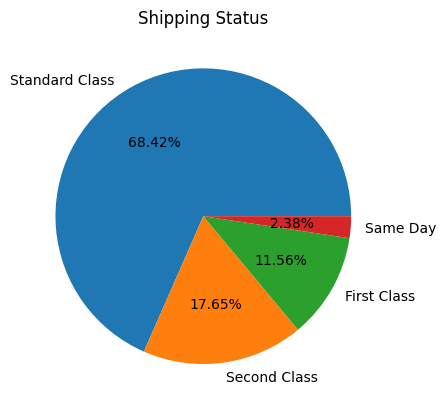

In [40]:
label=["Standard Class","Second Class","First Class","Same Day"]
plt.pie(df1,labels=label, autopct="%.2f%%")
plt.title("Shipping Status")

In [41]:
# By Ragion

shipping_mode_region=df.groupby(["Shipping Mode","Order Region"])["Order Id"].sum().reset_index(name="Number of orders")
px.bar(shipping_mode_region,x="Shipping Mode",y="Number of orders",
       color=shipping_mode_region["Order Region"],
       labels={"Shipping Mode":"Shipping Mode","Number of orders":"Number of orders"})

Which product has maximum price

In [42]:
df2=pd.DataFrame(df, columns=["Product Name","Product Price"])
df2.groupby(["Product Name","Product Price"]).sum().sort_values(by="Product Price",ascending=False)

,
Product Name,Product Price
Dell Laptop,1500.000000
SOLE E25 Elliptical,999.989990
Bushnell Pro X7 Jolt Slope Rangefinder,599.989990
Lawn mower,532.580017
Porcelain crafts,461.480011
...,...
Glove It Women's Imperial Golf Glove,19.990000
Hirzl Women's Soffft Flex Golf Glove,17.990000
Glove It Imperial Golf Towel,15.990000


Customer segment

In [43]:
df1=df["Customer Segment"].value_counts()
df1

Consumer       3104
Corporate      2083
Home Office     827
Name: Customer Segment, dtype: int64

Text(0.5, 1.0, 'Customer Segment')

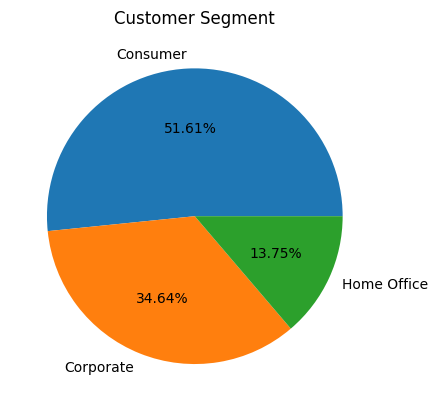

In [44]:
label=["Consumer","Corporate","Home Office"]
plt.pie(df1,labels=label, autopct="%.2f%%")
plt.title("Customer Segment")

In [45]:
category_name=df.groupby(["Category Name"])["Order Id"].count().reset_index(name="Orders").sort_values(by="Orders",ascending=True)
px.bar(category_name,x=category_name["Orders"],y=category_name["Category Name"],
       color=category_name["Orders"],
       labels={"Category Name":"Category Name","Orders":"Orders"},
      title="Maximum Category Orders")

Order benefits per order in specific country

In [46]:
geo_df = df.groupby(['Order Country'])['Benefit per order'].count().reset_index(name='total order').sort_values(by='total order',ascending=True)
fig = px.choropleth(geo_df ,  locationmode='country names', locations='Order Country',
                    color='total order',hover_name='Order Country')
fig.show()

Sales per year,month and day date

In [49]:
df['year'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[-1].split(' ')[0])

In [50]:
df['month'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[0].split(' ')[0])

In [51]:
df['day date'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[1].split(' ')[0])

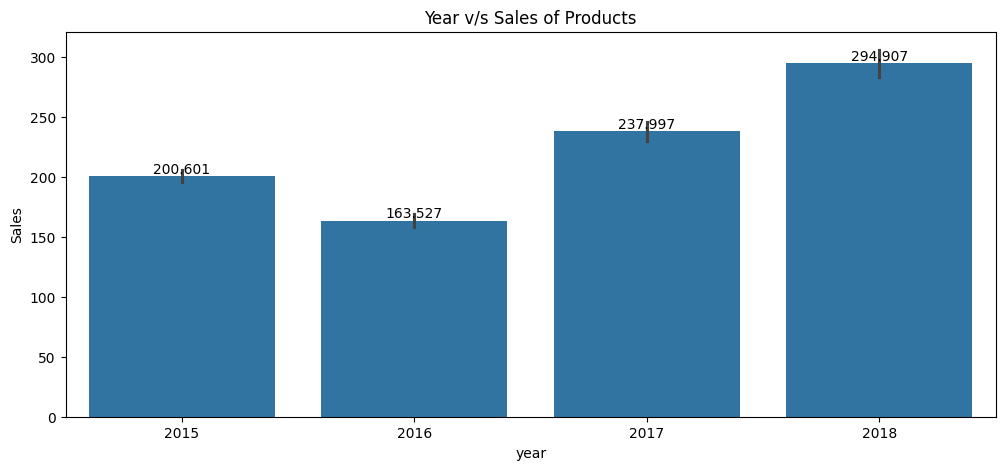

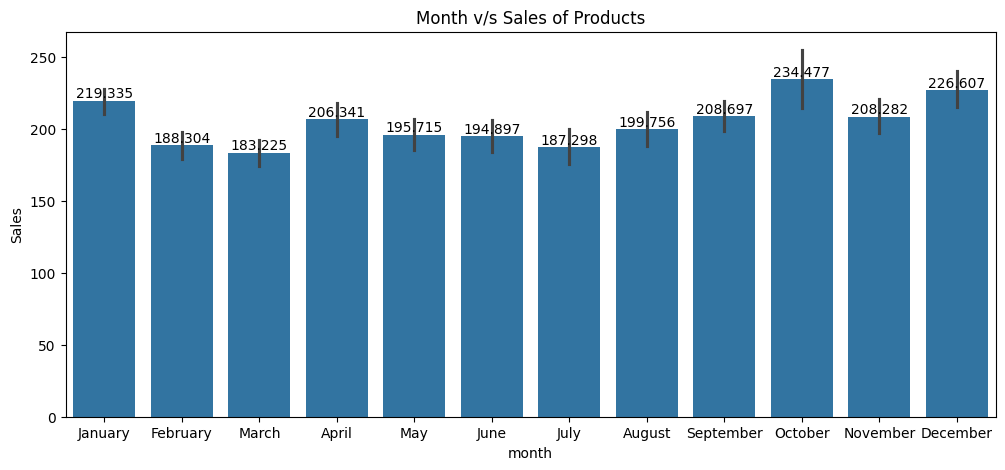

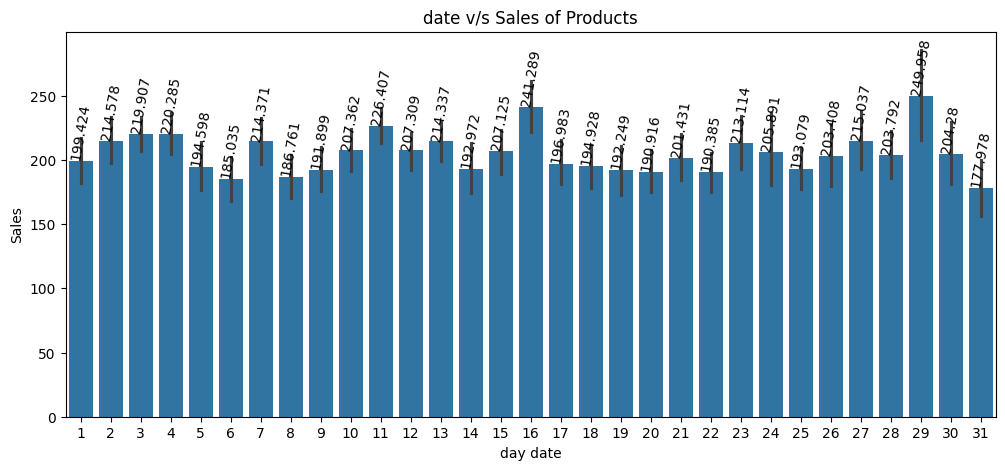

In [52]:
plt.figure(figsize = (12,5))
plt.title('Year v/s Sales of Products')
ax=sns.barplot(x = 'year',
            y = 'Sales',
              order=["2015","2016","2017","2018"],
            data = df);
for i in ax.containers:
    ax.bar_label(i,)

plt.figure(figsize = (12,5))
df["month"]=df["month"].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"])
plt.title('Month v/s Sales of Products')
ax=sns.barplot(x = 'month',
            y = 'Sales',
            order=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"],
            data=df);
for i in ax.containers:
    ax.bar_label(i,)

plt.figure(figsize = (12,5))
plt.title('date v/s Sales of Products')
ax=sns.barplot(x = 'day date',
            y = 'Sales',
            order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'],
            data = df);
for i in ax.containers:
    ax.bar_label(i,rotation=80)
plt.show()

Data Modeling

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [55]:
data_sales=df[['Type Of Payments','Benefit per order', 'Sales per customer', 'Delivery Status','Late_delivery_risk',
             'Category Name', 'Customer City','Customer Country','Customer Id','Customer Segment',
             'Customer State', 'Customer Zipcode','Department Name', 'Latitude', 'Longitude', 'Market',
             'Order City', 'Order Country', 'Order Customer Id','order date (DateOrders)', 'Order Id',
             'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
             'Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity', 'Sales',
             'Order Item Total','Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
             'Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description',
             'Product Name', 'Product Price','Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales'].astype(str)
features=features.apply(Labelencoder_feature)
features.head()

,Type Of Payments,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3538,922,0,0,34,60,1,4077,0,...,2,171,83,39,0,54,46,0,2283,3
1,3,147,919,1,1,34,60,1,4036,0,...,5,171,83,39,0,54,46,0,322,3
2,0,149,917,3,0,34,424,0,4035,0,...,1,171,83,39,0,54,46,0,286,3
3,1,1951,914,0,0,34,265,0,4034,2,...,2,171,83,39,0,54,46,0,243,3
4,2,3978,905,0,0,34,60,1,4033,1,...,6,171,83,39,0,54,46,0,191,3


In [56]:
final_features=features[['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)']]

In [57]:
final_features

,Benefit per order,Sales per customer,Category Name,Customer Id,Customer Segment,Department Name,Market,Order City,Order Customer Id,order date (DateOrders),...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders)
0,3538,922,34,4077,0,4,3,163,4077,597,...,922,3538,15,304,171,83,39,54,46,2283
1,147,919,34,4036,0,4,3,186,4036,262,...,919,147,13,527,171,83,39,54,46,322
2,149,917,34,4035,0,4,3,186,4035,261,...,917,149,13,527,171,83,39,54,46,286
3,1951,914,34,4034,2,4,3,1475,4034,260,...,914,1951,11,521,171,83,39,54,46,243
4,3978,905,34,4033,1,4,3,1475,4033,259,...,905,3978,11,521,171,83,39,54,46,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,4170,1041,20,3521,0,8,3,1406,3521,1116,...,1041,4170,11,465,171,78,34,33,53,1135
6010,4198,1029,20,3539,0,8,3,558,3539,1170,...,1029,4198,7,247,171,78,34,33,53,1181
6011,832,41,0,1150,0,8,3,132,1150,1166,...,41,832,20,70,171,60,20,63,6,1176
6012,1152,32,0,2014,0,8,3,1458,2014,370,...,32,1152,13,608,171,55,20,62,6,594


In [58]:
final_data=pd.concat([final_features,target],axis=1)
final_data.columns

Index(['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Sales'],
      dtype='object')

<Axes: >

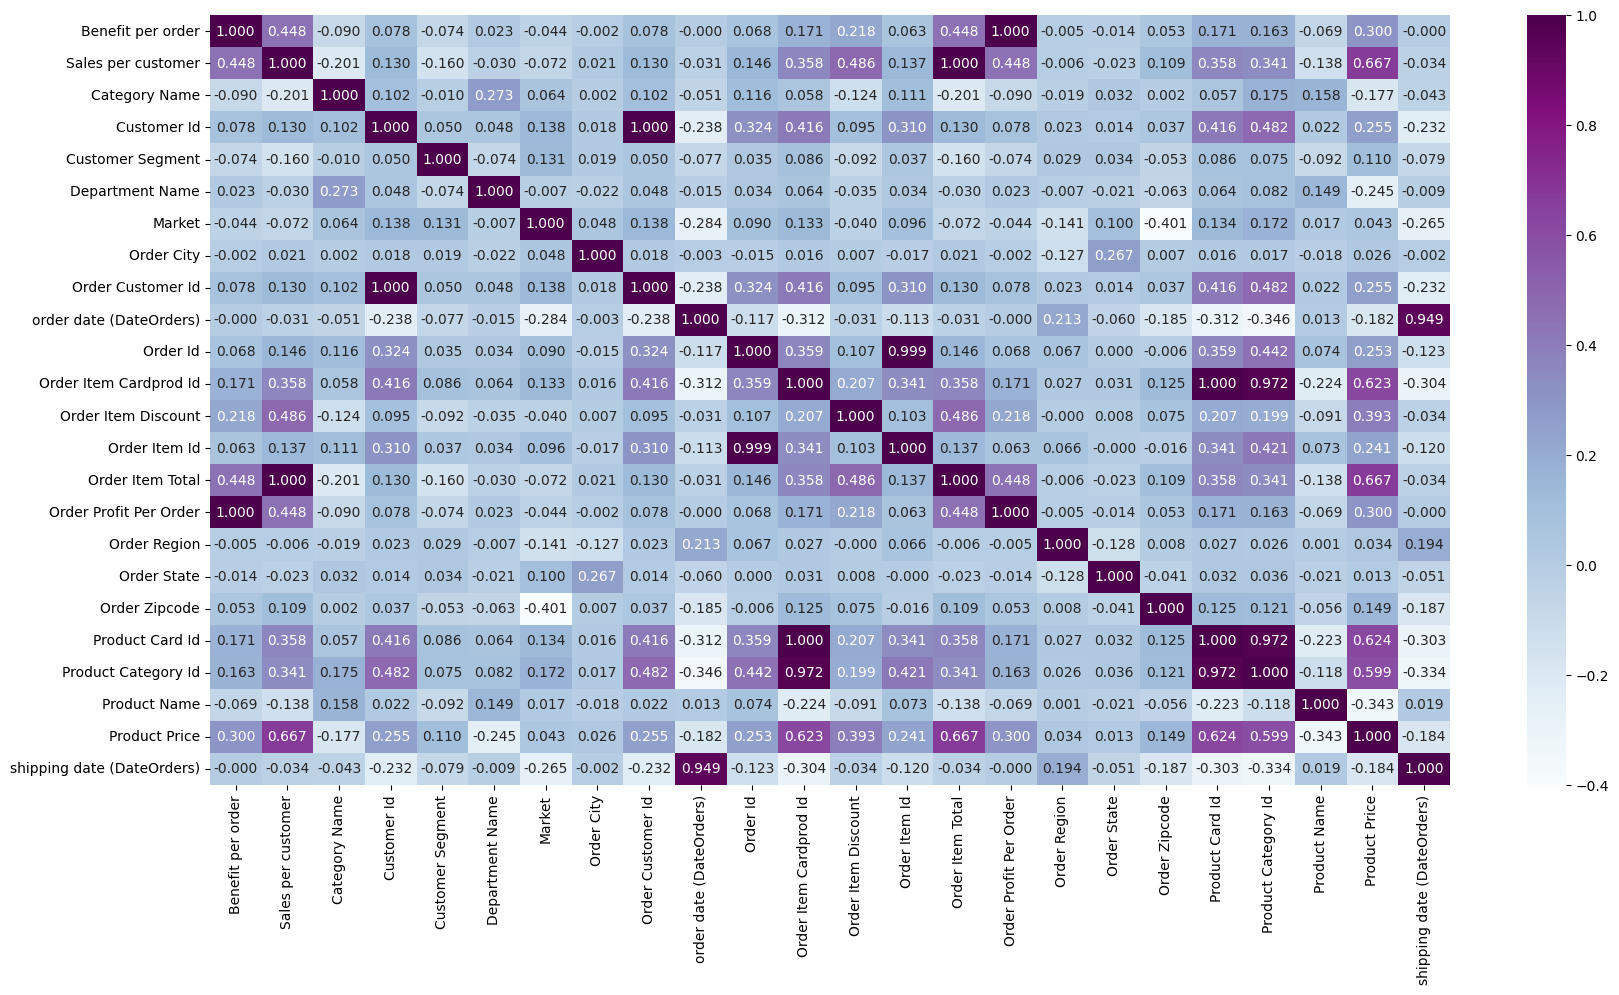

In [59]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True,fmt=".3f",cmap="BuPu")

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [61]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [62]:
linReg=LinearRegression()
linmodel=linReg.fit(X_train,y_train)

In [63]:
y_pred =linReg.predict(X_test)
y_pred

array([258.5138841 , 357.57705025, 123.70896849, ..., 251.006929  ,
       365.54200536, 224.75816468])

In [64]:
ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is: 0.8214622156461073
mean_sqrd_error is 3332.1352676305614
root_mean_squared error of is 57.72465043316037


In [65]:
lin_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : linmodel.predict(X_train)})
lin_train_predict.head(10)

,actual,predicted
2497,179.9700012,181.870594
1923,250.0,248.947980
1871,250.0,250.597661
4138,299.980011,331.735011
3792,90.0,130.265076
3908,299.980011,345.761477
2711,44.0,7.372800
3277,129.9900055,119.888462
3713,129.9900055,134.024881
2598,22.0,-21.953647


Lasso

In [66]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [67]:
lasReg=Lasso()
lasmodel=lasReg.fit(X_train,y_train)

In [68]:
y_prediction =lasReg.predict(X_test)
y_prediction

array([371.03157519, 347.4760857 , -22.4042418 , ..., 181.9827894 ,
       149.54015544, 354.38708352])

In [69]:
ls_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,ls_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.8421298822658431
mean_sqrd_error is 2723.581260473068
root_mean_squared error of is 52.1879417152379


Ridge regression

In [72]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [73]:
ridReg=Ridge()
ridmodel=ridReg.fit(X_train,y_train)

In [74]:
y_prediction =ridReg.predict(X_test)
y_prediction

array([205.24549285, 228.18738979, 138.54696671, ..., 140.04893639,
       205.92488254, 327.87539151])

In [75]:
rd_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rd_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.8052265932481157
mean_sqrd_error is 3681.832324258316
root_mean_squared error of is 60.678104158405574


KNN

In [76]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [77]:
knncls=KNeighborsClassifier()
knncls.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
y_prediction =knncls.predict(X_test)
y_prediction

array(['129.9900055', '129.9900055', '59.08000183', ..., '327.75',
       '110.0', '50.0'], dtype=object)

In [79]:
knn_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,knn_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.3876185376252437
mean_sqrd_error is 12114.7432159732
root_mean_squared error of is 110.06699421703674


In [80]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

       100.0       0.03      0.10      0.04        39
 103.9800034       0.00      0.00      0.00         1
 104.9700012       0.00      0.00      0.00         1
 109.9400024       0.00      0.00      0.00         3
 109.9499969       0.00      0.00      0.00         1
 11.28999996       0.50      0.25      0.33         4
       110.0       0.00      0.00      0.00        17
 111.9599991       0.00      0.00      0.00         2
 119.9700012       0.00      0.00      0.00        21
 119.9800034       0.03      0.04      0.03        28
       120.0       0.00      0.00      0.00         3
 124.9499969       0.00      0.00      0.00        10
       125.0       0.00      0.00      0.00        13
 127.9599991       0.00      0.00      0.00         5
 129.9900055       0.25      0.55      0.35       229
 134.9700012       0.00      0.00      0.00         6
 139.9499969       0.00      0.00      0.00         3
 139.9600067       0.00    

Naive bayes

In [81]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [82]:
sc=StandardScaler()

In [83]:
x_scaler=sc.fit_transform(final_features)

In [84]:
pipe=Pipeline(steps=[("sc",sc),("Guaasinnb", GaussianNB())])

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('Guaasinnb', GaussianNB())])

In [86]:
gu_Score=pipe.score(X_test, y_test)
gu_Score

0.8094182825484765

SVM

In [87]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [88]:
svmcls=svm.SVC()
svmodel=svmcls.fit(X_train,y_train)

In [89]:
y_prediction =svmcls.predict(X_test)
y_prediction

array(['299.980011', '327.75', '129.9900055', ..., '129.9900055',
       '327.75', '50.0'], dtype=object)

In [90]:
svc_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,svc_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.5435107085694743
mean_sqrd_error is 9366.066941985486
root_mean_squared error of is 96.77844254783957


decison tree

In [93]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [94]:
dectreecls=DecisionTreeClassifier()
dectreecls.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_prediction =dectreecls.predict(X_test)
y_prediction

array(['129.9900055', '150.0', '39.99000168', ..., '25.0', '50.0', '50.0'],
      dtype=object)

In [96]:
dt_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,dt_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9948346466700101
mean_sqrd_error is 95.91496935260598
root_mean_squared error of is 9.793618807805723


Random Forest

In [97]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [98]:
rfcls=RandomForestClassifier(random_state=42)
rfmodel=rfcls.fit(X_train,y_train)

In [99]:
y_prediction =rfcls.predict(X_test)
y_prediction

array(['129.9900055', '119.9800034', '100.0', ..., '22.0', '25.0',
       '200.0'], dtype=object)

In [100]:
rf_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rf_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9976667794102949
mean_sqrd_error is 51.406231786987234
root_mean_squared error of is 7.169813929732572


In [101]:
cm=confusion_matrix(y_test, y_prediction)
cm

array([[36,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 3,  0,  0, ...,  0,  5,  0],
       [ 0,  0,  0, ...,  0,  0, 29]])

In [102]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

       100.0       0.88      0.95      0.91        38
 104.9700012       1.00      1.00      1.00         2
 109.9400024       1.00      1.00      1.00         3
 109.9499969       1.00      1.00      1.00         2
 11.28999996       1.00      1.00      1.00         2
       110.0       1.00      0.95      0.98        21
 111.9599991       0.00      0.00      0.00         1
 119.9700012       1.00      1.00      1.00        31
 119.9800034       1.00      1.00      1.00        21
       120.0       0.00      0.00      0.00         2
 124.9499969       1.00      0.92      0.96        12
       125.0       0.87      0.87      0.87        15
 127.9599991       0.00      0.00      0.00         3
 129.9900055       1.00      1.00      1.00       240
 134.9700012       0.67      1.00      0.80         2
 139.9499969       0.00      0.00      0.00         0
 143.9700012       0.00      0.00      0.00         1
 149.9499969       0.75    

In [103]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_prediction, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')

In [104]:
from tabulate import tabulate
data = [["Linear Regression", "0.79998"],
        ["Lasso Regressor", "0.78626"],
        ["Ridge Regressor", "0.78782"],
        ["KNN Classifier","0.56420"],
        ["Gaussian Naive bayes","0.91400"],
        ["SVC Classifier","0.46160"],
        ["Gradient Boost","0.64219"],
        ["Random Forest","0.99989"],
        ["Decision Tree","0.99969"]]

col_names = ["Algorithms", "Accuracy"]


In [105]:
print(tabulate(data, headers=col_names))

Algorithms              Accuracy
--------------------  ----------
Linear Regression        0.79998
Lasso Regressor          0.78626
Ridge Regressor          0.78782
KNN Classifier           0.5642
Gaussian Naive bayes     0.914
SVC Classifier           0.4616
Gradient Boost           0.64219
Random Forest            0.99989
Decision Tree            0.99969


Create chart for accuracy of algorithms

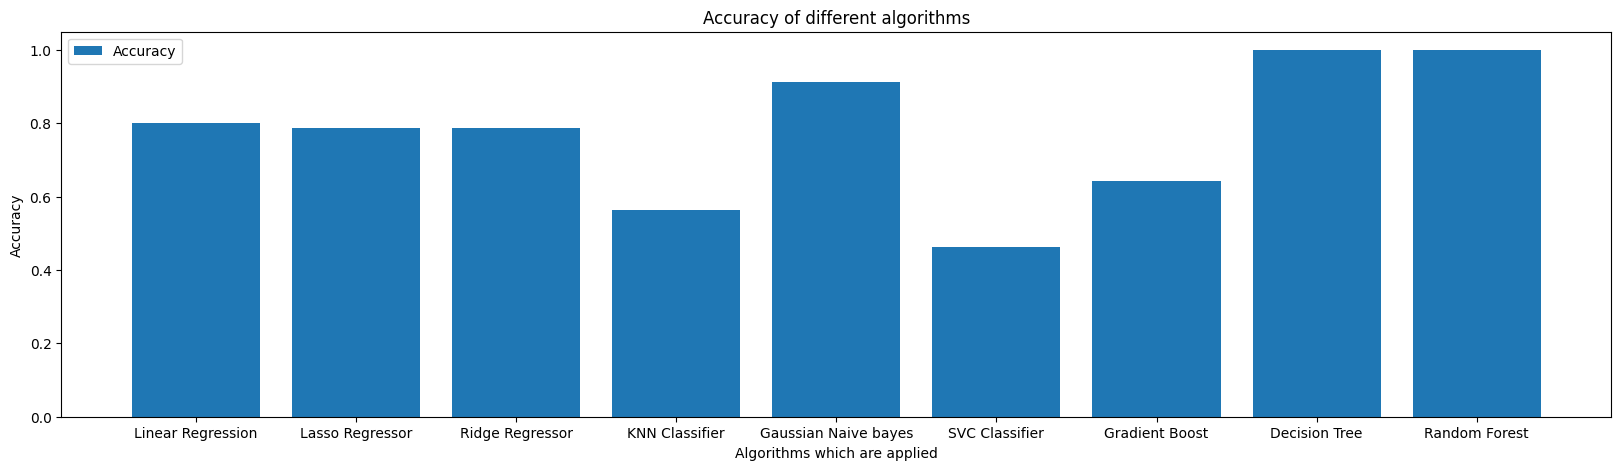

In [109]:
plt.figure(figsize = (20,5))
plt.bar(["Linear Regression","Lasso Regressor","Ridge Regressor","KNN Classifier","Gaussian Naive bayes",
         "SVC Classifier","Gradient Boost","Decision Tree","Random Forest"],
    [0.79998,0.78626,0.78782,0.56420,0.91400,0.46160,0.64219,0.99969,0.99989],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")
plt.show()